Accuracy on test set: 0.966


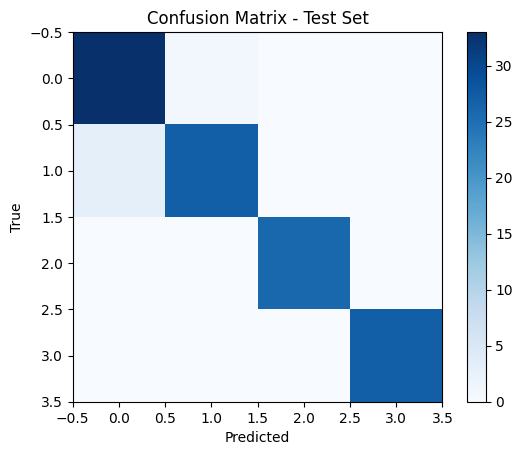

Cross-validation scores: [0.66666667 1.         0.96153846 0.75641026 0.83333333]


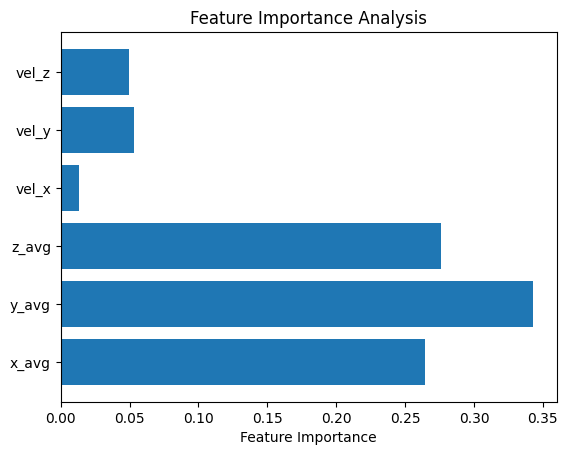

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.21875, 1: 0.975, 2: 0.9222972972972973, 3: 0.934931506849315}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensemble, 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('t_data.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=1.0, interval=0.1):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    
    # Drop rows with NaN values created by the rolling operation
    df = df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])
    
    return df

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Add derived features
df['vel_x'] = df['x_avg'].diff().fillna(0)
df['vel_y'] = df['y_avg'].diff().fillna(0)
df['vel_z'] = df['z_avg'].diff().fillna(0)

# Prepare the features and target variable
X = df[['x_avg', 'y_avg', 'z_avg', 'vel_x', 'vel_y', 'vel_z']].iloc[1:].values
y = df['label'].iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "y_avg", "z_avg", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.978


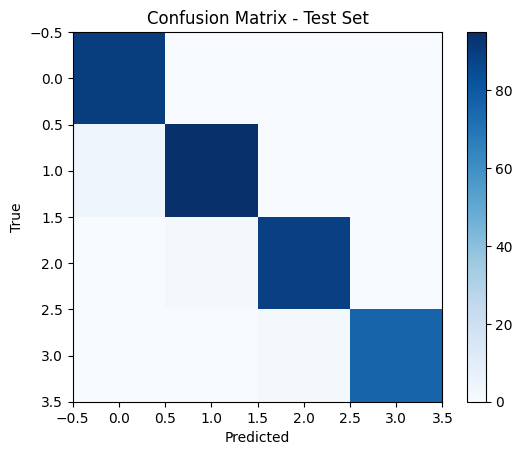

Cross-validation scores: [0.93305439 0.92016807 0.96218487 0.93697479 0.95378151]


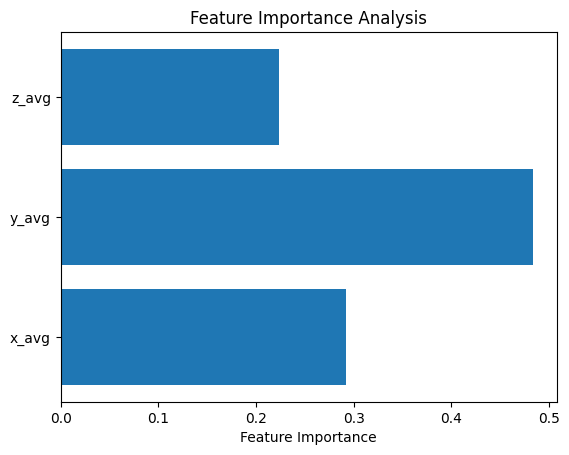

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.0360696517412935, 1: 1.0360696517412935, 2: 0.9964114832535885, 3: 0.9380630630630631}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everyw

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=1.0, interval=0.1):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    
    # Drop rows with NaN values created by the rolling operation
    df = df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])
    
    return df

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Prepare the features and target variable
X = df[['x_avg', 'y_avg', 'z_avg']].values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "y_avg", "z_avg"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.978


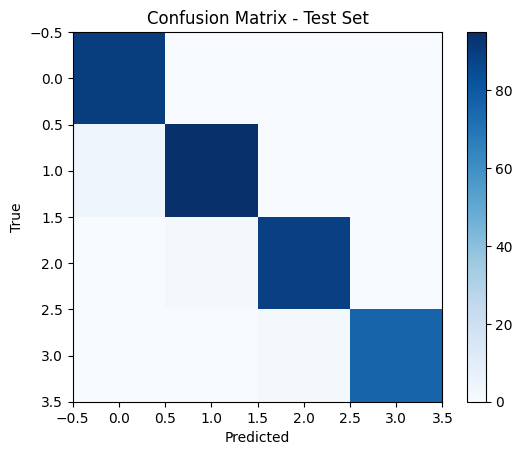

Cross-validation scores: [0.93305439 0.91176471 1.         0.93697479 0.96218487]


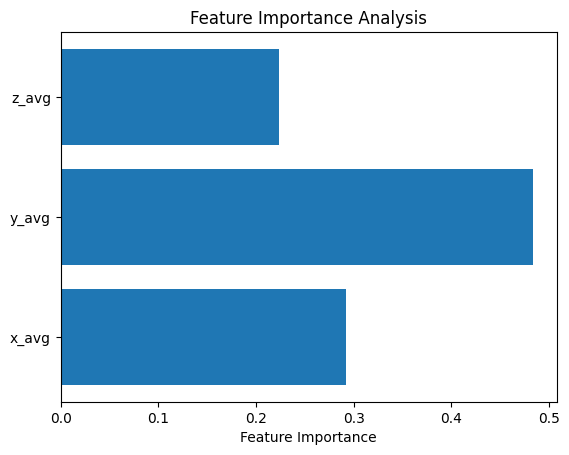

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.0360696517412935, 1: 1.0360696517412935, 2: 0.9964114832535885, 3: 0.9380630630630631}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everyw

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=1.0, interval=0.1):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    
    # Drop rows with NaN values created by the rolling operation
    df = df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])
    
    return df

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Prepare the features and target variable
X = df[['x_avg', 'y_avg', 'z_avg']].values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "y_avg", "z_avg"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.972


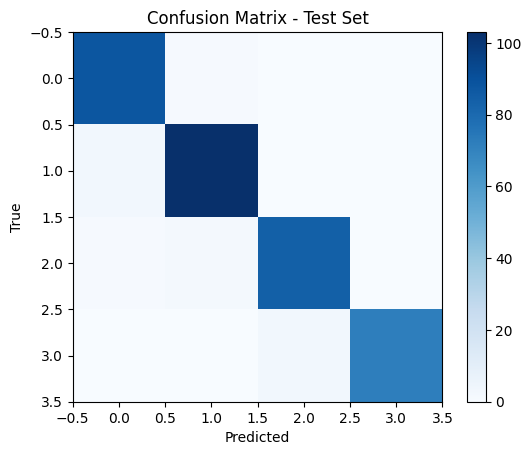

Cross-validation scores: [0.93277311 0.90336134 0.99579832 0.92436975 0.96638655]


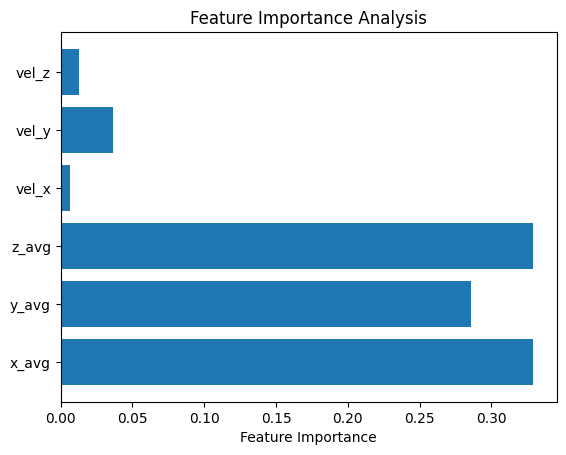

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.0360696517412935, 1: 1.0734536082474226, 2: 0.9776995305164319, 3: 0.9255555555555556}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everyw

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Simulate timestamps with 0.1-second intervals
df['timestamp'] = df.index * 0.1

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=1.0, interval=0.1):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    return df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Add derived features
df['vel_x'] = df['x_avg'].diff().fillna(0)
df['vel_y'] = df['y_avg'].diff().fillna(0)
df['vel_z'] = df['z_avg'].diff().fillna(0)

# Prepare the features and target variable
X = df[['x_avg', 'y_avg', 'z_avg', 'vel_x', 'vel_y', 'vel_z']].iloc[1:].values
y = df['label'].iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "y_avg", "z_avg", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.896


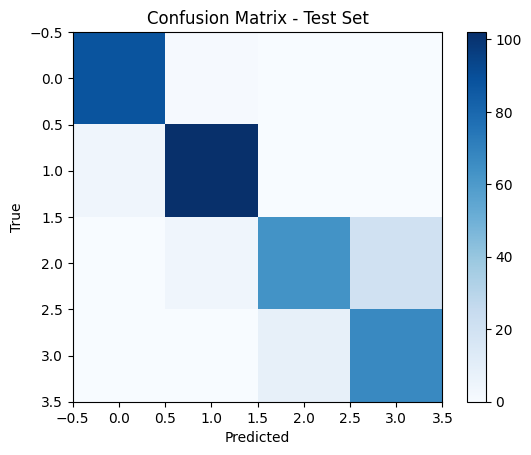

Cross-validation scores: [0.88235294 0.75210084 0.81092437 0.86554622 0.76470588]


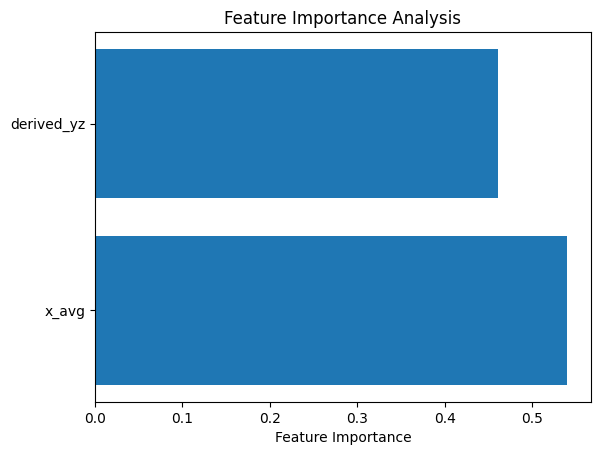

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.0360696517412935, 1: 1.0734536082474226, 2: 0.9776995305164319, 3: 0.9255555555555556}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everyw

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=1.0, interval=0.1):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    
    # Drop rows with NaN values created by the rolling operation
    df = df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])
    
    return df

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Add derived feature
df['derived_yz'] = abs(df['y_avg'] - df['z_avg'])

# Prepare the features and target variable
X = df[['x_avg', 'derived_yz']].iloc[1:].values
y = df['label'].iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "derived_yz"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.889


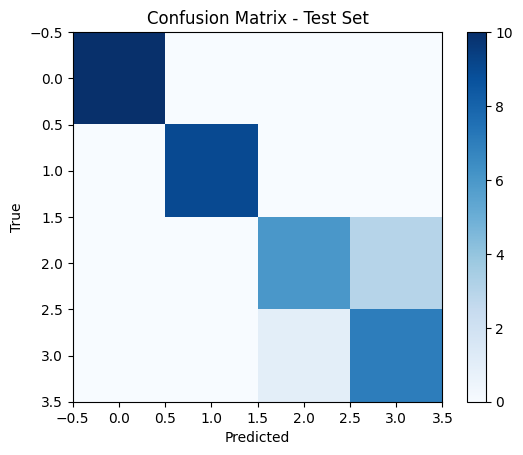

Cross-validation scores: [0.83333333 0.75       0.83333333 0.83333333 0.75      ]


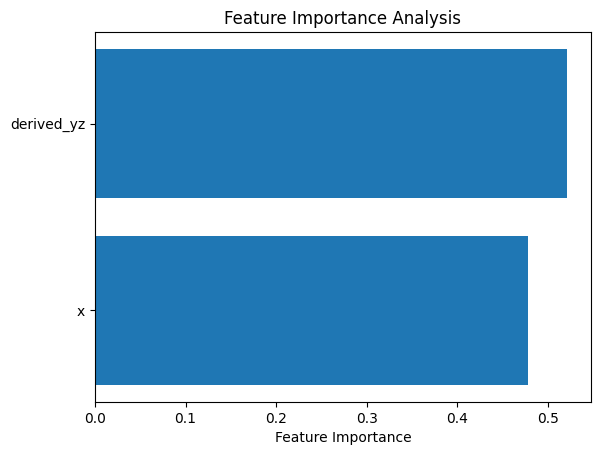

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.05, 1: 1.0, 2: 1.0, 3: 0.9545454545454546}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=42, te

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over specified window size
def average_sensor_data(df, window_size=10):
    df_avg = df.groupby(np.arange(len(df)) // window_size).mean()
    return df_avg

# Apply averaging function to the dataset
df_avg = average_sensor_data(df)

# Add derived features
df_avg['derived_yz'] = abs(df_avg['y'] - df_avg['z'])

# Prepare the features and target variable
X = df_avg[['x', 'derived_yz']].values
y = df_avg['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "derived_yz"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.917


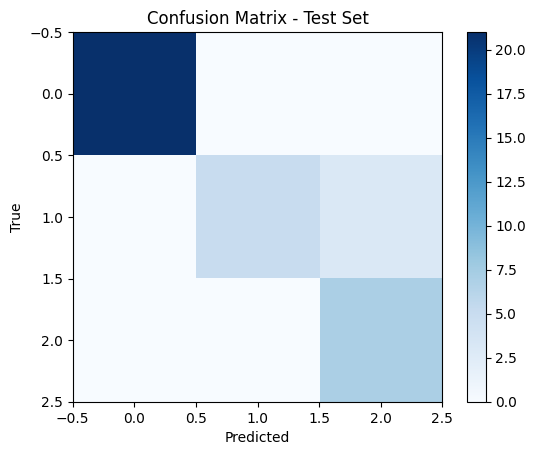

Cross-validation scores: [0.91666667 0.83333333 0.875      0.95833333 0.91666667]


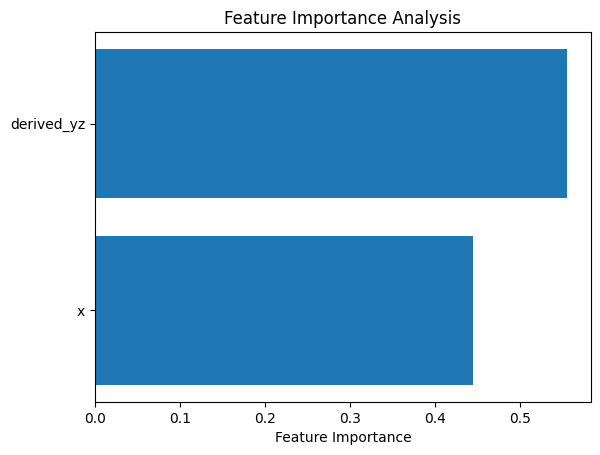

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 0.42857142857142855, 1: 4.2, 2: 1.1666666666666667, 3: 1.75}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensemble, ran

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=10):
    df_avg = df.groupby(np.arange(len(df)) // window_size).mean()
    return df_avg

# Apply averaging function to the dataset
df_avg = average_sensor_data(df)

# Add derived features
df_avg['derived_yz'] = abs(df_avg['y'] - df_avg['z'])

# Apply custom logic: if derived_yz < 8, set label to 0 (assuming 0 is "Good")
df_avg.loc[df_avg['derived_yz'] < 8, 'label'] = 0

# Prepare the features and target variable
X = df_avg[['x', 'derived_yz']].values
y = df_avg['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "derived_yz"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=10):
    df_avg = df.groupby(np.arange(len(df)) // window_size).mean()
    return df_avg

# Apply averaging function to the dataset
df_avg = average_sensor_data(df)

# Add derived features
df_avg['derived_yz'] = df_avg['y'] - df_avg['z']

# Apply custom logic to set the label
df_avg.loc[(abs(df_avg['y']) < 8) & (abs(df_avg['z']) < 8), 'label'] = 0
df_avg.loc[(df_avg['y'] - df_avg['z']) > 0, 'label'] = 1
df_avg.loc[(df_avg['z'] - df_avg['y']) > 0, 'label'] = 2

# Prepare the features and target variable
X = df_avg[['x', 'derived_yz']].values
y = df_avg['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "derived_yz"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


IndexError: list index out of range

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datafinal.csv')

# Assuming the dataset has a timestamp column in seconds
df['timestamp'] = df.index * 0.1  # Simulate timestamps with 0.1-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=10):
    df_avg = df.groupby(np.arange(len(df)) // window_size).mean()
    return df_avg

# Apply averaging function to the dataset
df_avg = average_sensor_data(df)

# Add derived features
df_avg['derived_yz'] = df_avg['y'] - df_avg['z']

# Apply custom logic to set the label
df_avg.loc[(abs(df_avg['y']) < 8) & (abs(df_avg['z']) < 8), 'label'] = 0
df_avg.loc[(df_avg['y'] - df_avg['z']) > 0, 'label'] = 1
df_avg.loc[(df_avg['z'] - df_avg['y']) > 0, 'label'] = 2

# Check unique labels
print("Unique labels after processing:", df_avg['label'].unique())

# Ensure labels are integers
df_avg['label'] = df_avg['label'].astype(int)

# Prepare the features and target variable
X = df_avg[['x', 'derived_yz']].values
y = df_avg['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "derived_yz"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Unique labels after processing: [1. 2.]


IndexError: list index out of range

In [16]:
import pandas as pd

# Load the CSV file
file_path = 'datafinal.csv'  # Path to your CSV file
df = pd.read_csv(file_path)

# Calculate the difference between y and z and create a new column for it
df['y-z'] = df['y'] - df['z']

# Update labels based on the given conditions
for index, row in df.iterrows():
    if row['x'] < 2000:
        df.at[index, 'label'] = 3
    elif 0 <= row['y-z'] <= 8:
        df.at[index, 'label'] = 0
    elif row['y-z'] > 0:
        df.at[index, 'label'] = 1
    elif row['y-z'] < 0:
        df.at[index, 'label'] = 2

# Select only the columns x, y-z, and label
df = df[['x', 'y-z', 'label']]

# Save the updated DataFrame to a new CSV file
output_file_path = 'updated_labels.csv'
df.to_csv(output_file_path, index=False)

print("Updated CSV file saved as 'updated_labels.csv'")


Updated CSV file saved as 'updated_labels.csv'


In [17]:
import pandas as pd
df = pd.read_csv("updated_labels.csv", sep=",")
df.head()

,x,y-z,label
0,6081,6.12,0
1,6673,4.93,0
2,5953,5.46,0
3,5585,2.25,0
4,5553,-9.05,2


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["X", "Y", "Z"]].diff().iloc[1:].values
y = df.Label.iloc[1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)